# **Week 1: Audio Signal Basics and Fundamentals**

## For uploading audio files directly from your computer

In [ ]:
from google.colab import files
# Upload audio file
uploaded = files.upload()
# Assuming a single file is uploaded
file_name = list(uploaded.keys())[0]

#be aware of the changes you will need to make accordingly in the codes below, like path and stuff

IndexError: list index out of range

## **1. Audio Signals**
### **Key Concepts:**
- [Signal Classification](https://eng.libretexts.org/Bookshelves/Electrical_Engineering/Signal_Processing_and_Modeling/Signals_and_Systems_%28Baraniuk_et_al.%29/01%3A_Introduction_to_Signals/1.01%3A_Signal_Classifications_and_Properties)

- Amplitude and Frequency  

### **Interactive Examples:**
- Generate a simple sine wave using NumPy.  
- Plot continuous and sampled versions of the sine wave using Matplotlib.

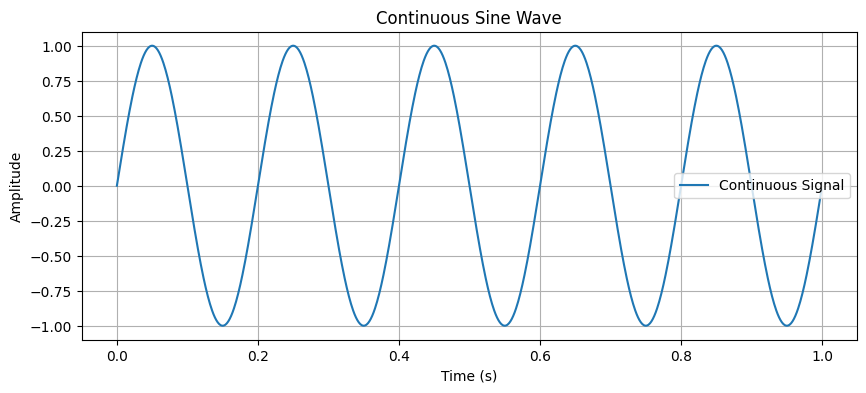

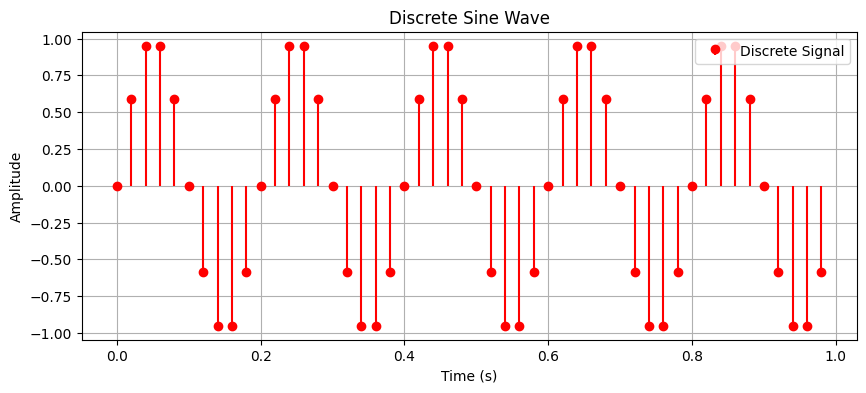

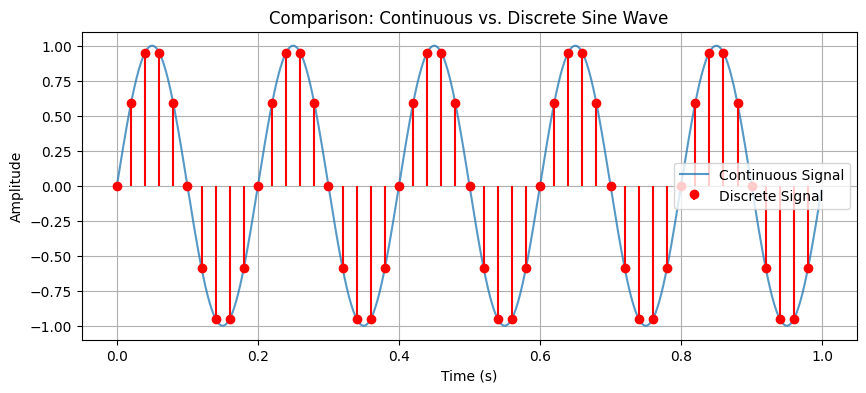

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a continuous sine wave
# Define parameters
frequency = 5  # Frequency in Hz
duration = 1.0  # Duration in seconds
sampling_rate_continuous = 1000  # High sampling rate for continuous approximation

# Create time values for the continuous signal
time_continuous = np.linspace(0, duration, int(sampling_rate_continuous * duration), endpoint=False)
sine_wave_continuous = np.sin(2 * np.pi * frequency * time_continuous)

# Plot continuous sine wave
plt.figure(figsize=(10, 4))
plt.plot(time_continuous, sine_wave_continuous, label="Continuous Signal")
plt.title("Continuous Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# 2. Generate a discrete sine wave (sampled signal)
sampling_rate_discrete = 50  # Lower sampling rate for discrete signal
time_discrete = np.linspace(0, duration, int(sampling_rate_discrete * duration), endpoint=False)
sine_wave_discrete = np.sin(2 * np.pi * frequency * time_discrete)

# Plot discrete sine wave
plt.figure(figsize=(10, 4))
plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
plt.title("Discrete Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# 3. Compare continuous vs. discrete signals
plt.figure(figsize=(10, 4))
plt.plot(time_continuous, sine_wave_continuous, label="Continuous Signal", alpha=0.75)
plt.stem(time_discrete, sine_wave_discrete, linefmt='r-', markerfmt='ro', basefmt=" ", label="Discrete Signal")
plt.title("Comparison: Continuous vs. Discrete Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# Please vary the sampling rates and check its affect on discretization of the signal

## **2. Fourier Transform (FT)**
### **What is FT?**
- Explanation of how FT transforms signals from the time domain to the frequency domain.  

### **Applications in Audio Processing**
- Example: Analyze a recorded audio file's frequency content.  

### **Interactive Code:**
- Implement FT using NumPy's `fft` module.  
- Plot the magnitude spectrum of an audio signal.
### **Resources**
- [Part 1](https://youtu.be/1JnayXHhjlg?si=fzGfO3LjdlG4Q9xN) [Part 2](https://youtu.be/kKu6JDqNma8?si=ni87JF9dbF6BZ20b)
- [3B1B](https://youtu.be/spUNpyF58BY?si=kQ2VRdJiXc9Jqwxg)
- [If you want to explore more](https://www.youtube.com/@iain_explains/playlists)

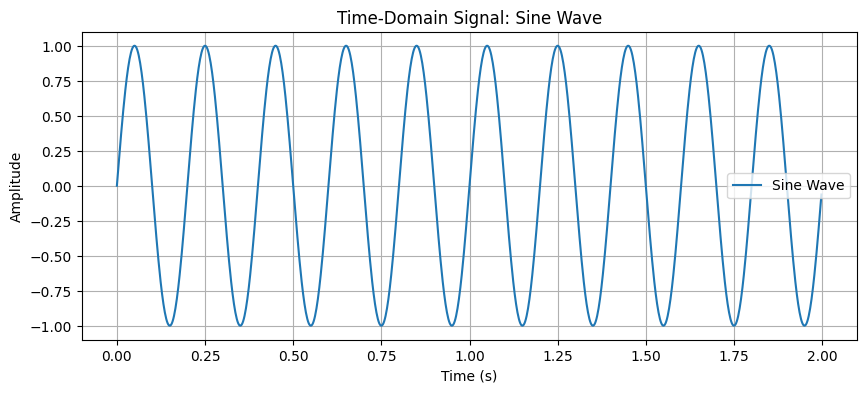

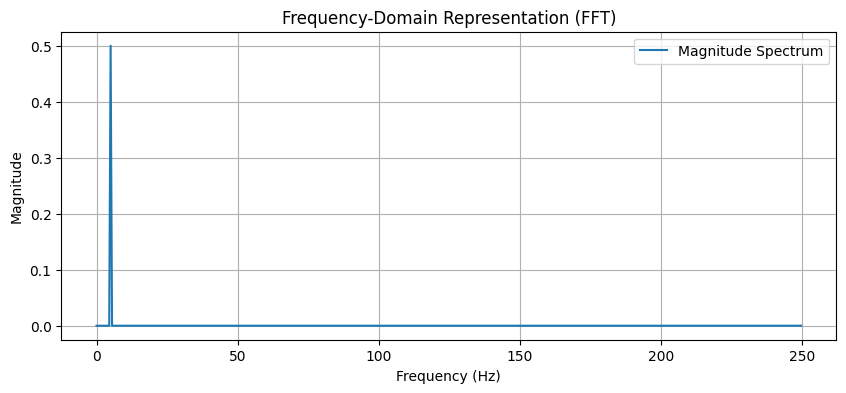

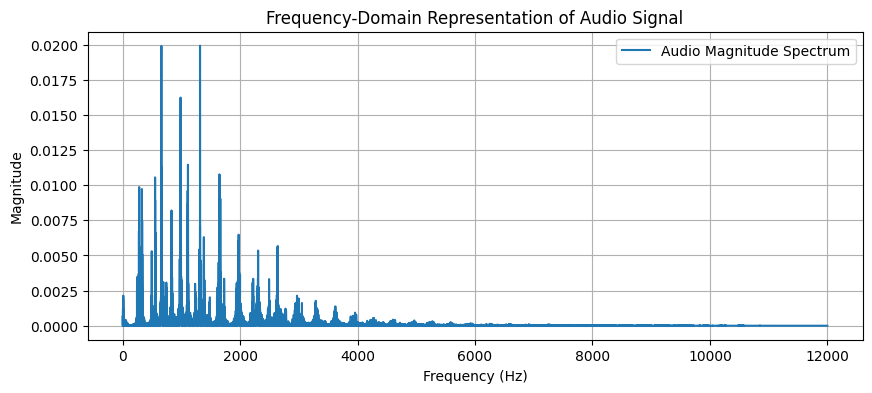

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# 1. Generate a sine wave signal
# Define parameters
frequency = 5  # Frequency in Hz
duration = 2.0  # Duration in seconds
sampling_rate = 500  # Sampling rate in Hz

# Create time values and sine wave
time = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)
sine_wave = np.sin(2 * np.pi * frequency * time)

# Plot the sine wave
plt.figure(figsize=(10, 4))
plt.plot(time, sine_wave, label="Sine Wave")
plt.title("Time-Domain Signal: Sine Wave")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.legend()
plt.show()

# 2. Fourier Transform of the sine wave
n = len(sine_wave)  # Number of samples
fft_values = np.fft.fft(sine_wave)  # Perform FFT
frequency_axis = np.fft.fftfreq(n, 1 / sampling_rate)  # Frequency bins

# Take only the positive half of the spectrum
positive_freqs = frequency_axis[:n // 2]
magnitude_spectrum = np.abs(fft_values[:n // 2]) / n  # Normalize the spectrum

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs, magnitude_spectrum, label="Magnitude Spectrum")
plt.title("Frequency-Domain Representation (FFT)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

# 3. Analyze a recorded audio file's frequency content
import librosa
import librosa.display

# Load an audio file (replace 'audio_file.wav' with your audio file path)
# Link to the trumptet sound we used : https://pixabay.com/sound-effects/trumpet-75426/
audio_file_path = 'audio_file.mp3'  # Provide your audio file path here
audio_signal, sr = librosa.load(audio_file_path, sr=None)  # Load file with original sampling rate

# Perform Fourier Transform on the audio signal
n_audio = len(audio_signal)
fft_audio = np.fft.fft(audio_signal)
frequency_axis_audio = np.fft.fftfreq(n_audio, 1 / sr)

# Take only the positive half of the spectrum
positive_freqs_audio = frequency_axis_audio[:n_audio // 2]
magnitude_spectrum_audio = np.abs(fft_audio[:n_audio // 2]) / n_audio

# Plot the magnitude spectrum of the audio signal
plt.figure(figsize=(10, 4))
plt.plot(positive_freqs_audio, magnitude_spectrum_audio, label="Audio Magnitude Spectrum")
plt.title("Frequency-Domain Representation of Audio Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.legend()
plt.show()

## **3. Short-Time Fourier Transform (STFT)**
### **Why STFT?**
- Introduce non-stationary signals and the need for STFT.  

### **Resolution Trade-offs:**
- Explanation of the window size trade-offs (time resolution vs. frequency resolution).  

### **Interactive Example:**
- Use `scipy.signal.stft` to compute and visualize the STFT of an audio signal.  
- Demonstrate effects of different window sizes on resolution.  
### **Resources**
- [Discrete Fourier Transform](https://www.tutorialspoint.com/digital_signal_processing/dsp_discrete_fourier_transform_introduction.htm)
- [FFT (optional)](https://youtu.be/h7apO7q16V0?si=rCxopDVqXk7Hojtv)
- [STFT](https://youtu.be/-Yxj3yfvY-4?si=6K_TMSXUZ8xGKNee)



Audio signal length: 324864 samples, Sampling rate: 24000 Hz


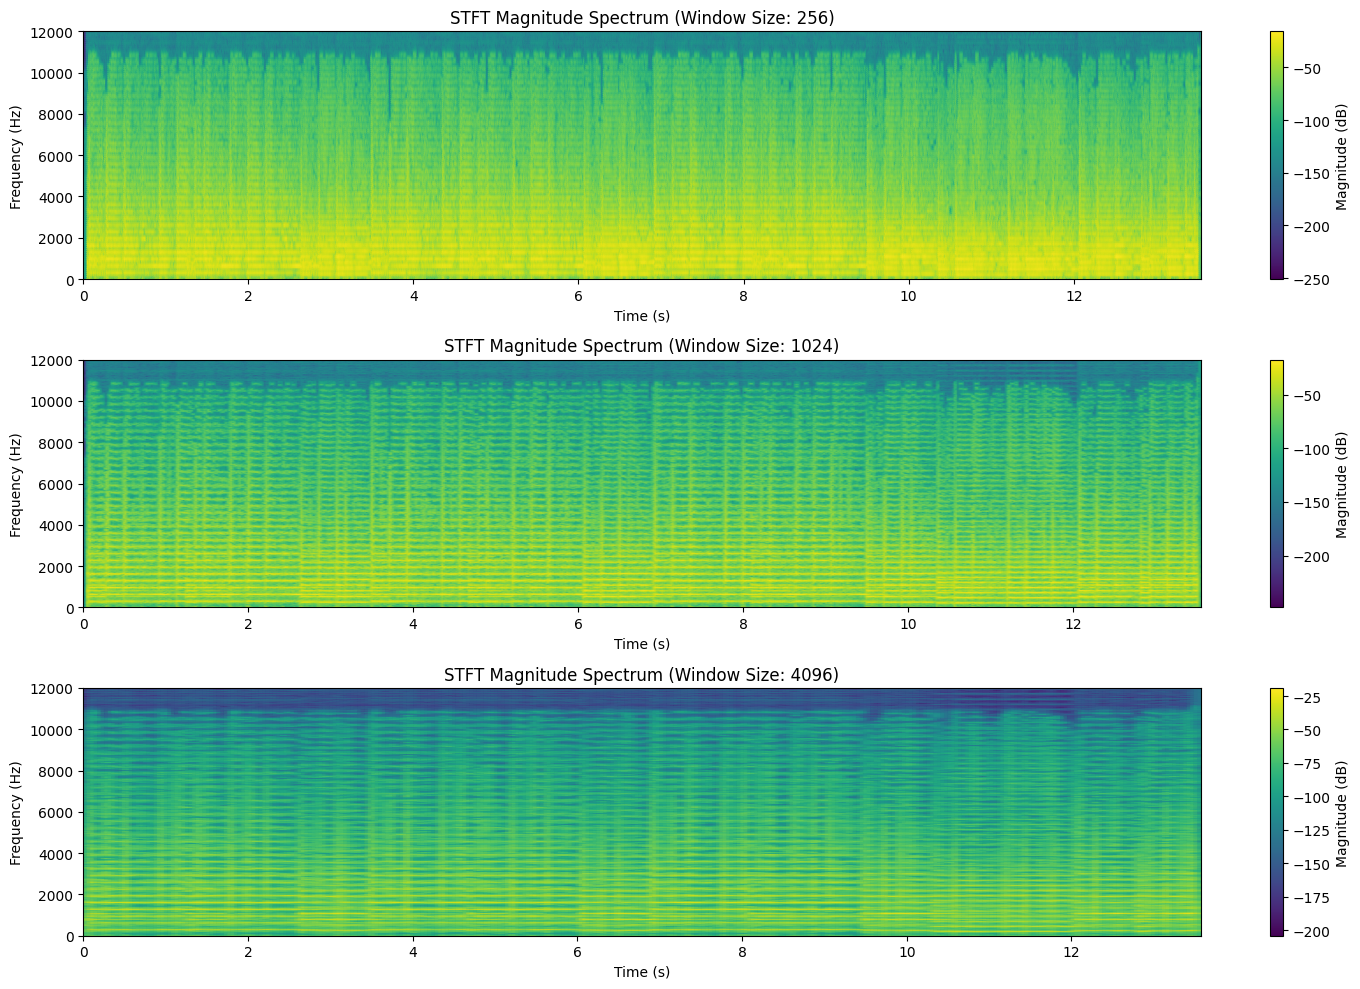


    Observations:
    - Smaller window size (e.g., 256): Better time resolution but poor frequency resolution.
    - Larger window size (e.g., 4096): Better frequency resolution but poor time resolution.
    - Trade-off: Choose window size based on whether time or frequency resolution is more important for your analysis.
    


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import stft
import librosa
import librosa.display

# 1. Load the audio file
audio_signal, sr = librosa.load("audio_file.mp3", sr=None)  # Load the MP3 file at its original sampling rate
print(f"Audio signal length: {len(audio_signal)} samples, Sampling rate: {sr} Hz")

# 2. Compute STFT with different window sizes
window_sizes = [256, 1024, 4096]  # Different window sizes for comparison

plt.figure(figsize=(15, 10))
for i, window_size in enumerate(window_sizes, 1):
    f, t, Zxx = stft(audio_signal, fs=sr, nperseg=window_size)  # Compute STFT

    # Magnitude spectrum
    magnitude = np.abs(Zxx)

    # Plot STFT magnitude
    plt.subplot(len(window_sizes), 1, i)
    plt.pcolormesh(t, f, 20 * np.log10(magnitude), shading='gouraud')  # Log scale for better visualization
    plt.title(f"STFT Magnitude Spectrum (Window Size: {window_size})")
    plt.ylabel("Frequency (Hz)")
    plt.xlabel("Time (s)")
    plt.colorbar(label="Magnitude (dB)")

plt.tight_layout()
plt.show()

# 3. Observations: Effect of window size
print(
    """
    Observations:
    - Smaller window size (e.g., 256): Better time resolution but poor frequency resolution.
    - Larger window size (e.g., 4096): Better frequency resolution but poor time resolution.
    - Trade-off: Choose window size based on whether time or frequency resolution is more important for your analysis.
    """
)


## **4. Spectrograms**
### **Definition:**
- Visual representation of a signal in the time-frequency domain.  

### **Interactive Code:**
- Use `matplotlib.pyplot.specgram` or `librosa.display.specshow` to create a spectrogram.  
- Load an audio file using `librosa` and visualize its spectrogram.

### **Resources**
- [MEL Spectrogram explained easily](https://youtu.be/9GHCiiDLHQ4?si=zV94r5AyFUKjvhX1)
- [Ariticle on STFT and Spectrogram](https://speechprocessingbook.aalto.fi/Representations/Spectrogram_and_the_STFT.html)

Audio signal length: 324864 samples, Sampling rate: 24000 Hz


<ipython-input-7-924a7dd279de>:11: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)  # Compute STFT and convert to dB


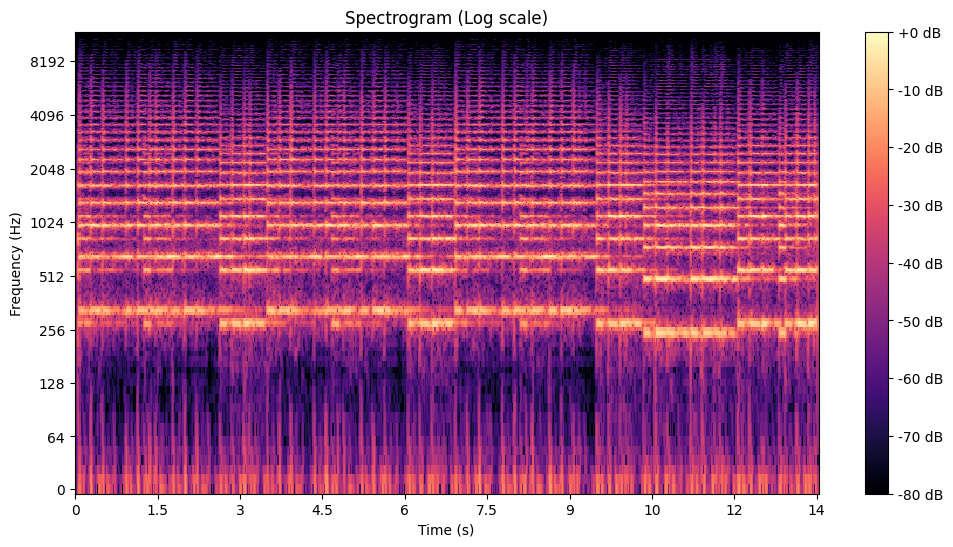

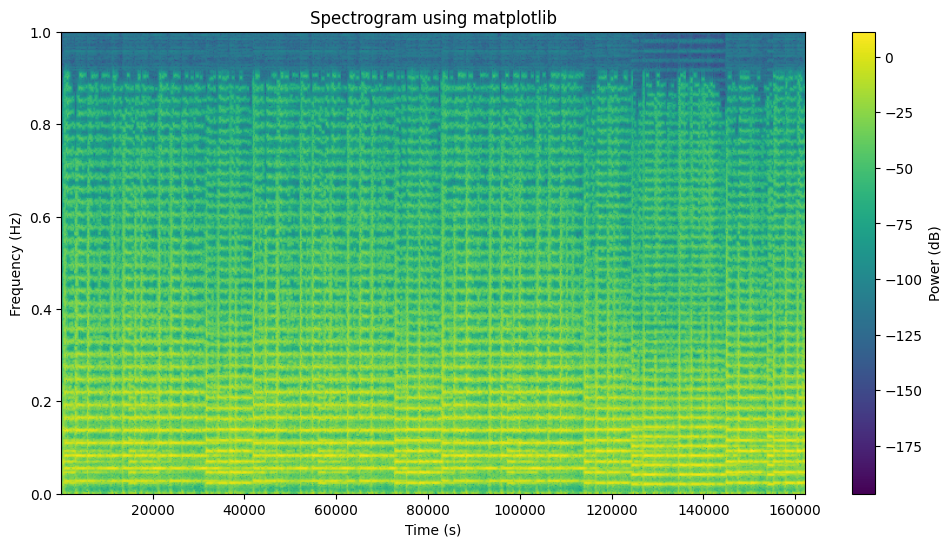

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# 1. Load the audio file (MP3 file in this case)
audio_signal, sr = librosa.load("audio_file.mp3", sr=None)  # Load the MP3 file at its original sampling rate
print(f"Audio signal length: {len(audio_signal)} samples, Sampling rate: {sr} Hz")

# 2. Compute the Spectrogram using librosa's melspectrogram function (commonly used)
D = librosa.amplitude_to_db(librosa.stft(audio_signal), ref=np.max)  # Compute STFT and convert to dB

# 3. Plot the spectrogram using librosa.display.specshow
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')  # Log scale for frequency
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram (Log scale)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.show()

# 4. Alternatively, using matplotlib's specgram for visualizing the spectrogram
plt.figure(figsize=(12, 6))
plt.specgram(audio_signal, NFFT=1024, Fs=2, noverlap=512, scale='dB')  # NFFT=1024 and overlap=512 for good resolution
plt.title('Spectrogram using matplotlib')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power (dB)')
plt.show()

## **5. Sampling and Quantization**
### **Concepts:**
- Define sampling rate and explain the Nyquist theorem.  
- Discuss the impact of quantization on signal quality.  

### **Interactive Examples:**
- Simulate aliasing by undersampling a high-frequency signal.  
- Visualize quantization levels and their effect on signal accuracy.  

### **Resources:**
- [sampling](https://youtu.be/yWqrx08UeUs?si=H8xrQw-f-y6pB-uF)
- [Sampling Theorem](https://youtu.be/iQaFDpiNOlA?si=VLK_8o274D8zzTae)


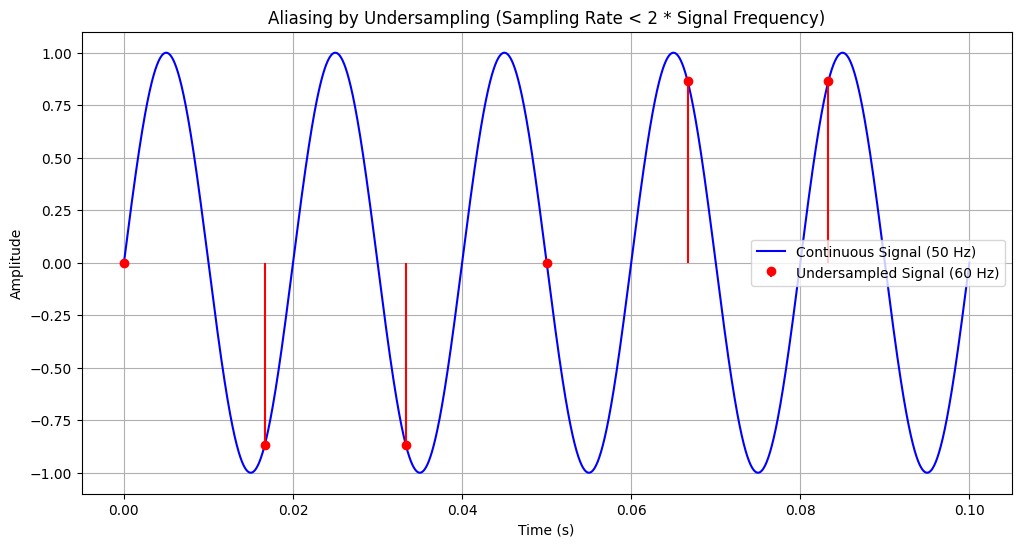

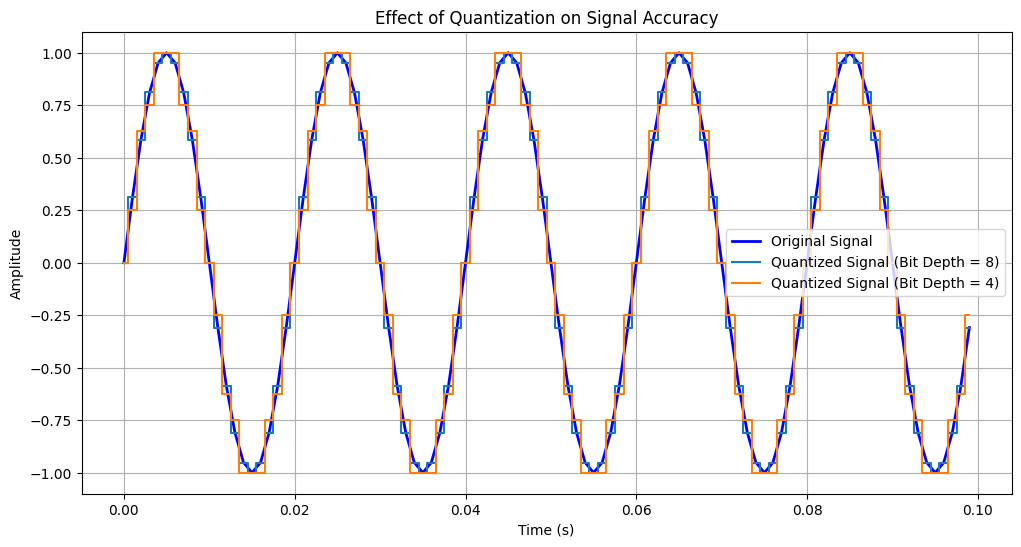

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
signal_freq = 50  # Frequency of the continuous signal (in Hz)
sampling_rate_high = 200  # High sampling rate for accurate representation
sampling_rate_low = 60  # Low sampling rate that will cause aliasing
duration = 0.1  # Duration in seconds

# 1. Create the time values for the continuous signal
time_continuous = np.linspace(0, duration, 10000)  # Fine time resolution for continuous signal
signal_continuous = np.sin(2 * np.pi * signal_freq * time_continuous)

# 2. Aliasing by Undersampling (low sampling rate)
time_low_sampled = np.linspace(0, duration, int(sampling_rate_low * duration), endpoint=False)  # Undersampling
signal_low_sampled = np.sin(2 * np.pi * signal_freq * time_low_sampled)

# 3. Plot continuous signal and undersampled signal
plt.figure(figsize=(12, 6))
plt.plot(time_continuous, signal_continuous, label="Continuous Signal (50 Hz)", color='b')
plt.stem(time_low_sampled, signal_low_sampled, label="Undersampled Signal (60 Hz)", linefmt='r-', markerfmt='ro', basefmt=" ")
plt.title("Aliasing by Undersampling (Sampling Rate < 2 * Signal Frequency)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()

# 4. Quantization Example
# Create a signal with a high sampling rate
sampling_rate_high = 1000  # High sampling rate for the quantization example
time_quantized = np.linspace(0, duration, int(sampling_rate_high * duration), endpoint=False)
signal_quantized = np.sin(2 * np.pi * signal_freq * time_quantized)

# Define different bit depths for quantization (8-bit and 4-bit)
bit_depths = [8, 4]
quantized_signals = {}

# Quantize the signal with different bit depths
for bit_depth in bit_depths:
    # Calculate the quantization step size
    step_size = 2 / (2 ** bit_depth)  # For a normalized signal between -1 and 1
    quantized_signal = np.round(signal_quantized / step_size) * step_size  # Quantize the signal
    quantized_signals[bit_depth] = quantized_signal

# Plot original and quantized signals for different bit depths
plt.figure(figsize=(12, 6))
plt.plot(time_quantized, signal_quantized, label="Original Signal", color='b', lw=2)

for bit_depth, quantized_signal in quantized_signals.items():
    plt.step(time_quantized, quantized_signal, label=f"Quantized Signal (Bit Depth = {bit_depth})", where='mid')

plt.title("Effect of Quantization on Signal Accuracy")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()